In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Single Univariate Gaussian Distribution

Given a $\mu$ and a $\sigma$, we can simulate the distribution by drawing $N$ samples out of a normal distribution with those parameters.

Let the probability density of the normal distribution given $\mu$ and $\sigma$ be $f(x) = \mathcal{N}(\mu, \sigma^2)$.

In [2]:
mu = 5
sigma = 2

In [3]:
# Simulated
N = 1000
sim_single = np.random.normal(mu, sigma, N)

In [4]:
# Analytical
x_single = np.linspace(-5, 12, 100)
pdf_single = norm.pdf(x_single, loc=mu, scale=sigma)

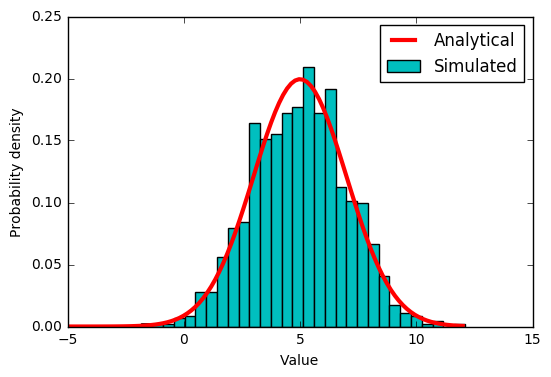

In [5]:
plt.hist(sim_single, bins=30, normed=True, color='c', label="Simulated")
plt.plot(x_single, pdf_single, linewidth=3, color='r', label="Analytical")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.show()

### Mixture of Univariate Gaussian Distributions

Given $K$ different populations that are normally distributed, each with its own $\mu$ and $\sigma$, we can simulate the mixture distribution by drawing $N$ samples from each normal distribution, and pooling together all $KN$ samples.

The probability density of the mixture distribution can be expressed as the weight sum of the individual densities:

$$g(x) = \frac{1}{K} \sum_{i = 1}^K f_i(x) =  \frac{1}{K} \sum_{i = 1}^K \mathcal{N}(\mu_i, \sigma_i^2)$$

In [6]:
mus = [2, 12, 20]
sigmas = [3, 1, 2]
K = len(mus)

In [7]:
# Simulated
N = 1000
sim_mix = []
for mu, sigma in zip(mus, sigmas):
    sim_mix = np.append(sim_mix, np.random.normal(mu, sigma, N), axis=0)

In [8]:
# Analytical
x_mix = np.linspace(-5, 30, 100)
pdf_mix = np.zeros(100)
for mu, sigma in zip(mus, sigmas):
    pdf_mix = pdf_mix + norm.pdf(x_mix, loc=mu, scale=sigma)
pdf_mix = pdf_mix / K

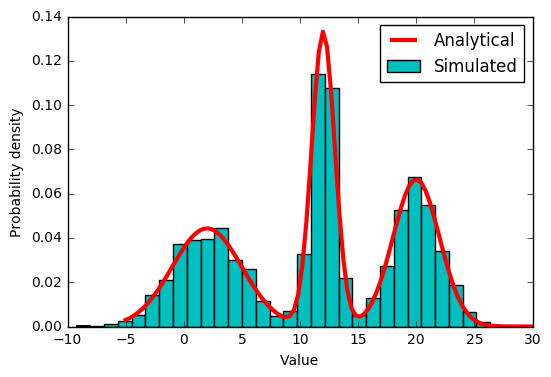

In [9]:
plt.hist(sim_mix, bins=30, normed=True, color='c', label="Simulated")
plt.plot(x_mix, pdf_mix, linewidth=3, color='r', label="Analytical")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.show()